In [1]:
# CELL1 – 10 marks
################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################
health2017 = pd.read_table("./2017health.txt")

tbr = health2017['Teen Birth Rate']
vcr = health2017['Violent Crime Rate']
ps = health2017['Percentage Smokers']


ps_s, ps_me = std(ps), mean(ps) 

CI = 1.96*ps_s/sqrt(len(ps))

tabel = {
    '': ['Mean', 'Minimum', 'Maximum', 'Standard Deviation'],
    'Teen Birth Rate': [ round(mean(tbr),2), round(min(tbr), 2), round(max(tbr), 2), round(std(tbr), 2) ],
    'Violent Crime Rate': [ round(mean(vcr), 2), round(min(vcr), 2), round(max(vcr), 2), round(std(vcr), 2) ],
    'Precentage Smokers': [round(ps_me, 2), round(min(ps), 2), round(max(ps), 2), round(ps_s, 2) ]
}


Tabular_structure = pd.DataFrame(tabel)
Tabular_structure.set_index('', inplace=True)

display(Tabular_structure)
print('')
print('The 95% confidence interval for precentage smokers is' '[' + str(round(ps_me-CI, 2)), str(round(ps_me+CI, 2)) + ']' )
print('')
print('The 95% confindence interval for precentage smokers shows that the we are 95% confindent that the data is between' '[', "%.2f" %(ps_me-CI), "%.2f" %(ps_me+CI), ']' )

Populating the interactive namespace from numpy and matplotlib


,Teen Birth Rate,Violent Crime Rate,Precentage Smokers
,,,
Mean,41.50,409.59,16.92
Minimum,15.00,127.00,11.00
Maximum,77.00,809.00,21.00
Standard Deviation,14.56,166.17,2.37



The 95% confidence interval for precentage smokers is[16.35 17.5]

The 95% confindence interval for precentage smokers shows that the we are 95% confindent that the data is between[ 16.35 17.50 ]


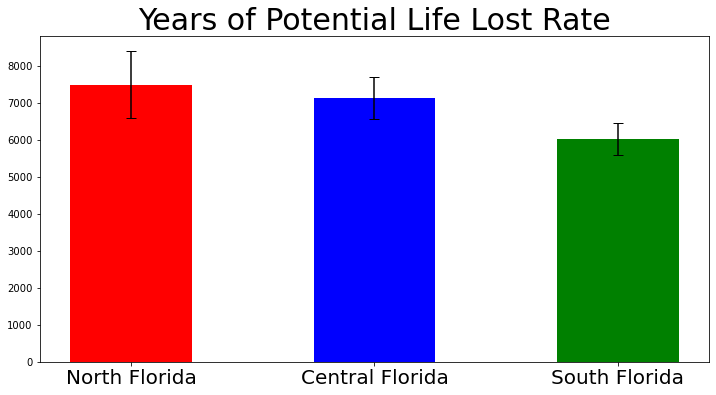

In [2]:
# CELL2 – 10 marks
YPL = health2017.loc[:, ['County', 'Years of Potential Life Lost Rate']]

nf = YPL.loc[YPL["County"].isin(['Duval', 'Alachua', 'Leon', 'Flagler', 'Marion'])]
cf = YPL.loc[YPL["County"].isin(['Orange', 'Polk', 'Hillsborough', 'Pinellas', 'Brevard'])]
sf = YPL.loc[YPL["County"].isin(['Miami-Dade', 'Broward', 'Lee', 'Palm Beach', 'Sarasota'])]

nf_ypl = nf['Years of Potential Life Lost Rate']
cf_ypl = cf['Years of Potential Life Lost Rate']
sf_ypl = sf['Years of Potential Life Lost Rate']

nf_me = mean(nf_ypl)
cf_me = mean(cf_ypl)
sf_me = mean(sf_ypl)

nf_ci = 1.96*std(nf_ypl)/sqrt(len(nf_ypl))
cf_ci = 1.96*std(cf_ypl)/sqrt(len(cf_ypl))
sf_ci = 1.96*std(sf_ypl)/sqrt(len(sf_ypl))

figure(figsize(12,6))
N=3
ind = arange(N)
width = 0.5
bar(ind, [nf_me, cf_me, sf_me], width, color=['r', 'b', 'g'], yerr=[nf_ci, cf_ci, sf_ci], capsize=5)
xticklabels = ['North Florida', 'Central Florida', 'South Florida']
xtickloc = ind
xticks(xtickloc, xticklabels, rotation='horizontal', fontsize=20)
title('Years of Potential Life Lost Rate', fontsize=30)
capsize=5
show()



In [3]:
# CELL3 – 10 marks
comb = health2017[['Teen Birth Rate', 'Percentage Smokers']]
ypll = YPL['Years of Potential Life Lost Rate']

comb = sm.add_constant(comb)
results=sm.OLS(ypll, comb).fit()
const=results.params[0]
coef_tbr=results.params[1]
coef_ps=results.params[2]

modelA_pred_ypllr = 60.6*tbr+5297.06
modelB_pred_ypllr = 1.36*vcr+7254.3

model_a_error=abs(modelA_pred_ypllr - ypll)
model_b_error=abs(modelB_pred_ypllr - ypll)

A_MAE=mean(model_a_error)
B_MAE=mean(model_b_error)

norm_A = stats.shapiro(tbr)[1]
norm_B = stats.shapiro(vcr)[1]
altTesta = stats.mannwhitneyu(model_a_error,model_b_error, alternative='two-sided')

print('Regression model: YPLLR = ' + str(round(coef_tbr,2)) + ' * Teen Birth Rate - ' + str(round(coef_ps, 2)) + ' * Precemtage Smokers + ' + str(round(const, 2)))
print('')
print('Firstly when doing the normality test on both models using the shapirowilt test we can see that Model A is normal ')
print('and Model B is not normal. Normality test for Model A = ' + str(round(norm_A, 2)) + ' normaility test for Model B ' + str(round(norm_B, 2)))
print('After learning that Model B is not normal i had to do a alternative test. The name of the alternative test i used is ' )
print('manwhitney. The manwhitney test indicated that there is no signifigant difference between the two models. The output of')
print('the manwhitney test is '+ str(round(altTesta[1], 3)) + ' since the value is slighly more than 0.05 it indicates no signiigant difference')
print('')
print('The data analytical team should use Model A instead of Model B even though the manwhitney test indictaes no signifigant')
print('differnce between the two models, the MAE of Model A which is '+ str(round(A_MAE, 2)) + " is much lower than the MAE of Model B which is " + str(round(B_MAE, 2)))
print('indicating that MAE has a lower mean absolute error.')



Regression model: YPLLR = 36.09 * Teen Birth Rate - 225.19 * Precemtage Smokers + 2503.14

Firstly when doing the normality test on both models using the shapirowilt test we can see that Model A is normal 
and Model B is not normal. Normality test for Model A = 0.17 normaility test for Model B 0.03
After learning that Model B is not normal i had to do a alternative test. The name of the alternative test i used is 
manwhitney. The manwhitney test indicated that there is no signifigant difference between the two models. The output of
the manwhitney test is 0.052 since the value is slighly more than 0.05 it indicates no signiigant difference

The data analytical team should use Model A instead of Model B even though the manwhitney test indictaes no signifigant
differnce between the two models, the MAE of Model A which is 948.46 is much lower than the MAE of Model B which is 1219.42
indicating that MAE has a lower mean absolute error.


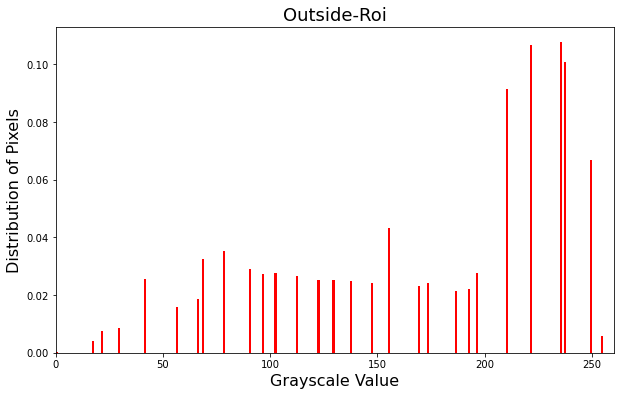

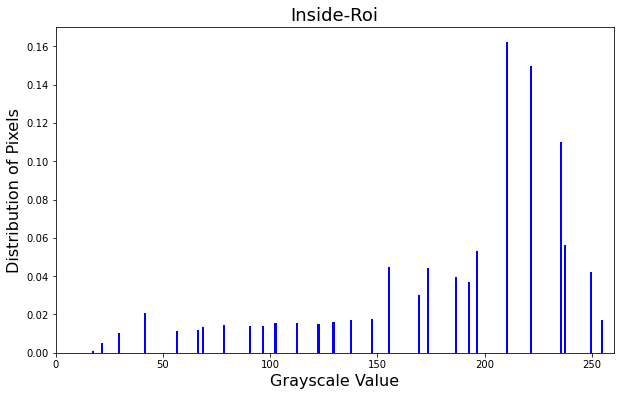

The similiarity score is : 0.11
The similiarity socre shows that distrubution of pixels of the outside roi and inside roi are similar as the similarity score (0.11) is closer to 0.


In [4]:
# CELL4 – 10 marks
img=imread("Model/m1.png")*255 
img_ar = np.array(img) 

drawcircle= Circle((256,256), 150, color='r', alpha=0.25) # is a circle that represents a roi  

x, y= np.ogrid[:512, :512]
center = [256, 256]
radius = 150

d_f_c = np.sqrt((x - center[0])**2 + (y-center[1])**2)
mask = d_f_c <= radius #
#The mask variable shows true and false values. False means its outside the mask true meaning its inside but the x and y values 
#for all the different true and false values is how you find the inside and outside roi. as the x and y for the the 
#masked image are the same as a normal image. 

a, b, out_roi, in_roi = -1, -1, [], []
for x in mask:
    a = a+1
    for y in x:
        b = b+1
        if b == 512: # getting the values using the mask the mask is used as the coordinates.  
            b = 0
        if y == False:
            out_roi.append(img_ar[a,b])
        elif y == True:
            in_roi.append(img_ar[a,b])     

bins = arange(0, 256, 1)
figure(figsize(10,6))
hist(out_roi, bins, density=True, color='r')
counts,bins,bars = hist(out_roi, bins, density=True, color='r')
xlim(0, 260)
xticks(arange(0, 280, 50)) # making the histograms
ylabel("Distribution of Pixels", fontsize = 16)
xlabel("Grayscale Value", fontsize = 16)
title("Outside-Roi", fontsize = 18)
show()


figure(figsize(10, 6))
hist(in_roi, bins, density=True, color='b')
counts1,bins1,bars1 = hist(in_roi, bins, density=True, color='b')
xlim(0, 260) 
xticks(arange(0, 280, 50))
ylabel("Distribution of Pixels", fontsize = 16)
xlabel("Grayscale Value", fontsize = 16)
title("Inside-Roi", fontsize = 18)
show()

np_a1 = numpy.array(counts)
np_a2 = numpy.array(counts1)

ed = np.linalg.norm(np_a1-np_a2) # finding the elucidean distance. 
print("The similiarity score is : "+ str(round(ed, 2)))
print("The similiarity socre shows that distrubution of pixels of the outside roi and inside roi are similar as the similarity score (0.11) is closer to 0.")

Pearson linear correlation coefficient  0.81
The r value shows that this is a strong postive correlation meaning that the higher the average pixel intensity the higher the overall image quality


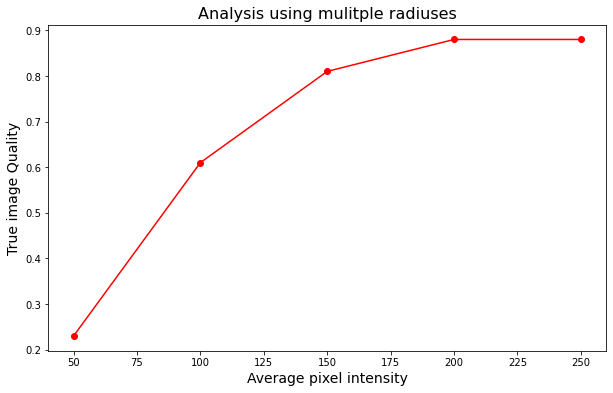

In [5]:
# CELL5 – 10 marks
def finding_mask(x, y, radius, center):
    d_f_c = np.sqrt((x - center[0])**2 + (y-center[1])**2) # finds all the items inside of the roi using radius
    mask = d_f_c <= radius
    return mask

def get_value(masks, img_ar):
    a, b, in_roi = -1, -1, []
    for x in masks: #using coordinates gets the posistion of all the grey scale values inside the mask.
        a = a+1
        for y in x: #  coordinates are gotten using the mask
            b = b+1
            if b == 512:
                b = 0
            if y == True:
                in_roi.append(img_ar[a,b])
    return in_roi

def get_mean(pl):
    n = 10
    sp = 1
    me=[]
    for w in arange(n):
        img1=imread('Model/m'+str(sp+w)+'.png')*255 # find the mean for the gotten values
        img1_ar=np.array(img1)
        val = get_value(pl, img1_ar)
        me.append(mean(val))        
    return me

def apply_mask(rad):
    radi = []
    for i in rad:
        a = finding_mask(x,y,i,center) # finds mask for all radius values
        radi.append(a)
    return radi

x, y = np.ogrid[:512, :512]
center = [256, 256] # the first two are used for getting the mask. next one is to put all the radius values into one list.
rads = [50, 100, 150, 200, 250]
coef = [] # adds the coefficent

rad = apply_mask(rads)

q_score = pd.read_excel("Q_scores.xlsx")
score = q_score['Quality'] # gets the values of the quality scores to be used to find all the coefficients

get_vals = finding_mask(x, y, 150, center)
get_val = get_mean(get_vals) #gets the values for only the radius of 150

for q in rad:
    drawcircle= Circle((256,256), q, color='r', alpha=0.25)
    me = get_mean(q)
    s = stats.pearsonr(me, score)[0] #to plot the graph
    coef.append(s)
    me=[]        
    

print("Pearson linear correlation coefficient ", round(stats.pearsonr(get_val, score)[0],2))
print("The r value shows that this is a strong postive correlation meaning that the higher the average pixel intensity the higher the overall image quality")

plt.plot(rads,np.round(coef,2), marker='o', color='r' ) # plotting the graph 
title("Analysis using mulitple radiuses", fontsize = 16)
ylabel("True image Quality", fontsize = 14)
xlabel("Average pixel intensity",  fontsize = 14)
plt.show()


Regression model for IQ = 0.64*API-101.45
MSE = 2.03



,Name,API,True IQ,Predicted IQ
0,m3,166.22,8,5.74
1,m4,165.39,7,5.21
2,m9,162.93,2,3.62
3,m1,175.25,10,11.57
4,m10,161.12,1,2.45


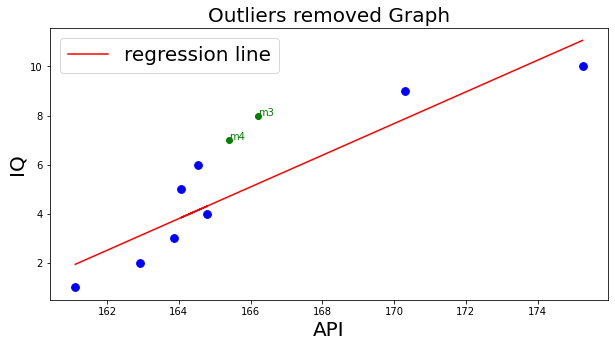

The two outliers i removed to get the lowest MSE is m3 and m4 this is shown on the graph


In [6]:
# CELL6 – 10 marks
q_scores = pd.read_excel("./Q_scores.xlsx") # reading the Quality scores
IQ = q_scores['Quality']


api= []
n=10
sp=1
for w in arange(n):
    img1=imread('Model/m'+str(sp+w)+'.png')*255 #get all image arrays
    img1_ar=np.array(img1)
    api.append(mean(img1_ar))



API=sm.add_constant(api)
resu = sm.OLS(IQ, API).fit() #getting slope and intercept
slope = resu.params[1]
intercept = resu.params[0]
 
f = pd.DataFrame(data=api) #changing api into a dataframe so it can be used below

pred_IQ=slope*f[0]+intercept
aerror=abs(pred_IQ - IQ)
MSE=mean(aerror**2)

image_names = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'] # list of all names os img file
for i in range(0, 10):
    dist = pred_IQ - IQ
    distance = abs(dist)
table = list(zip(image_names, distance, api, IQ, pred_IQ )) #putting a set of list into a multidemsional list
table = sorted(table, key=lambda x:-x[1]) #sorting into desending order using Lambda 
out=[]
for i in range(0,5):
    out.append(table[i]) # getting the first 5 elements from the table above
tables= pd.DataFrame(out, columns=['Name', 'dist', 'API', 'True IQ', 'Predicted IQ']) #putting into a table
tables = tables.drop("dist", axis=1) # getting rid of the dist i used to find the worst outlier
tables['API'] = tables['API'].astype(float).apply(lambda x: round(x,2))
tables['Predicted IQ'] = tables['Predicted IQ'].astype(float).apply(lambda x: round(x,2))
redu_table = list(zip(image_names, api, IQ))
redu_table = pd.DataFrame(redu_table, columns=['Name', 'API', 'True IQ']) # second table with removed outliers

redu_table = redu_table.set_index('Name')
redu_table = redu_table.drop(['m3', 'm4'], axis=0)

APIi=sm.add_constant(redu_table['API'])
resul = sm.OLS(redu_table['True IQ'], APIi).fit() # creating second slope and intercept to make a scatter graph with the line of bitfit
slope2 = resul.params[1]
intercept2 = resul.params[0]
data = pd.DataFrame(data=api)
n_pred_IQ= slope2*redu_table['API']+intercept2
aerror2=abs(n_pred_IQ - redu_table['True IQ'])

print("")
print("Regression model for IQ = " + str(round(slope,2)) + '*API' + str(round(intercept, 2)))
print("MSE =", round(MSE,2))
print("")
display(tables)
print("")



figure(figsize=(10,5))
x_coor, y_coor= [166.21523,165.38919], [8,7]
scatter(x_coor, y_coor, marker='o', color='g')
text(x_coor[0],y_coor[0],'m3', color='g')
text(x_coor[1],y_coor[1],'m4', color='g')
title('Outliers removed Graph', fontsize=20) # Creating table
xlabel('API', fontsize=20)
ylabel('IQ', fontsize=20)
scatter(redu_table['API'],redu_table['True IQ'], s=60, c='b', marker='o', edgecolors=None)

line = slope2 * redu_table['API'] + intercept2
plot(redu_table['API'], line,'b-', label='regression line', color='r')
legend(loc='best', fontsize=20)

show()

print("The two outliers i removed to get the lowest MSE is m3 and m4 this is shown on the graph")




In [7]:
import scipy
print(scipy.__version__)

1.6.2
